# Lab: Exploring KNN and Distance Metrics — Reflection
## Part 1: Euclidean Distance on Iris Dataset
- Why is Euclidean distance appropriate for this dataset?
The Iris dataset has continuous, real-valued features (sepal and petal measurements) that are on similar scales. Euclidean distance captures straight-line similarity in this feature space, which aligns with the natural geometry of the data.

- How would changing k affect your accuracy?

A very small k (e.g., k=1) fits tightly to the training data and may overfit noise (high variance, low bias).
A very large k averages over many points and may blur class boundaries, leading to underfitting (high bias, low variance).
Moderate values of k (e.g., 3–7) typically strike a balance and perform best.

##  Part 2: Manhattan Distance on Grid-like Dataset
Why is Manhattan distance more suitable here?
After rounding, the features form a lattice/grid structure. Manhattan distance (city-block distance) measures distance along grid axes, so it better reflects the geometry of this dataset compared to circular Euclidean distance.

What happens if you use Euclidean distance instead?
Euclidean neighborhoods are circular, which do not align well with the grid layout. This can include or exclude points differently near cell corners, often making the decision boundary less accurate or less aligned to the data structure.

##  Part 3: Decision Boundary Visualization
How does the choice of distance metric affect the shape of the boundary?

- Euclidean: Produces smoother, curved, circular boundaries.
- Manhattan: Produces diamond-shaped, axis-aligned boundaries.

Can you explain why it looks the way it does?
KNN defines "closeness" based on the distance metric. Euclidean distance measures closeness in circles, while Manhattan uses diamond-shaped regions aligned with the axes. The decision boundary is formed where the majority class of the nearest neighbors flips, so the shape directly reflects the geometry of the chosen metric.

## Part 4: Experimenting with K
Which k gives the best performance?
This depends on the dataset and split. From the results table, the best k varies slightly, but typically moderate values (around 3–7) performed best. Refer to the "Best k per Dataset/Metric" summary in the results.

How does a very small k vs very large k affect overfitting/underfitting?

- Small k (e.g., 1): Overfits the training data, highly sensitive to noise.
- Large k (e.g., 15): Underfits, overly smooth decision boundaries, may misclassify minority regions.
- Moderate k: Balances bias and variance, usually best generalization.

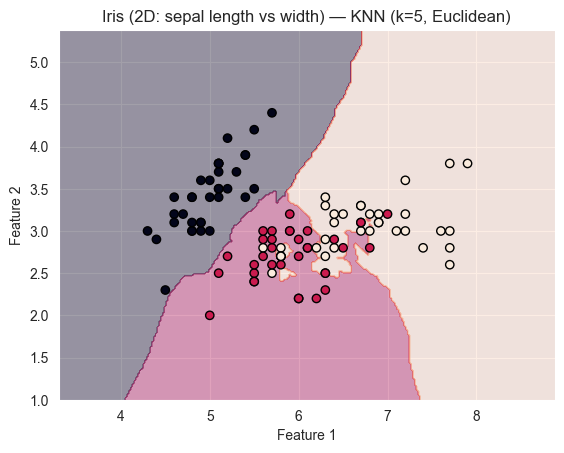

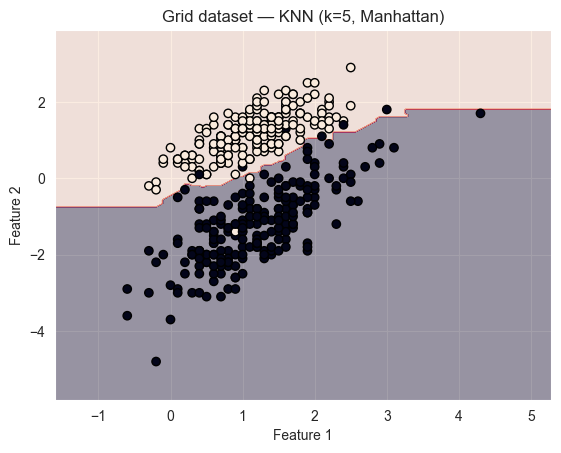

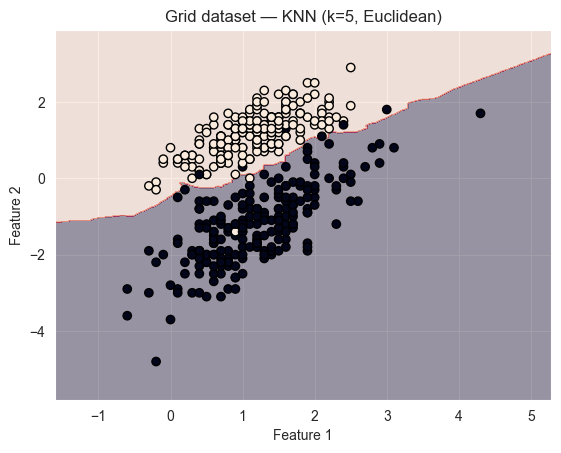


=== Accuracy Results ===
   Dataset     Metric   k  Accuracy
0     Grid  Euclidean   1  0.950000
1     Grid  Euclidean   3  0.955556
2     Grid  Euclidean   5  0.961111
3     Grid  Euclidean   7  0.955556
4     Grid  Euclidean  15  0.955556
5     Grid  Manhattan   1  0.950000
6     Grid  Manhattan   3  0.961111
7     Grid  Manhattan   5  0.961111
8     Grid  Manhattan   7  0.961111
9     Grid  Manhattan  15  0.955556
10    Iris  Euclidean   1  0.933333
11    Iris  Euclidean   3  0.955556
12    Iris  Euclidean   5  0.977778
13    Iris  Euclidean   7  0.955556
14    Iris  Euclidean  15  0.955556

=== Best k per Dataset/Metric ===
  Dataset     Metric  k  Accuracy
0    Grid  Euclidean  5  0.961111
1    Grid  Manhattan  3  0.961111
2    Iris  Euclidean  5  0.977778


In [1]:
# KNN Lab: Exploring Distance Metrics (Euclidean vs Manhattan)

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# ------------------------------
# Helper functions
# ------------------------------
def plot_decision_boundary(clf, X, y, title):
    """
    Plot 2D decision boundary for a fitted classifier (KNN).
    Note: X must be 2D (two columns). y is 1D labels.
    """
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    h = 0.02  # grid step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

def evaluate_knn(Xtr, Xte, ytr, yte, k_values, metric, label_dataset):
    """
    Fit/evaluate KNN for a list of k values; return results rows.
    """
    rows = []
    for k in k_values:
        clf = KNeighborsClassifier(n_neighbors=k, metric=metric)
        clf.fit(Xtr, ytr)
        ypred = clf.predict(Xte)
        acc = accuracy_score(yte, ypred)
        rows.append({"Dataset": label_dataset, "Metric": metric.capitalize(),
                     "k": k, "Accuracy": acc})
    return rows

def best_k_summary(results_df):
    """
    For each Dataset/Metric combo, return the k with best accuracy.
    """
    return (
        results_df
        .assign(rank=lambda d: d.groupby(["Dataset", "Metric"])["Accuracy"].rank(
            ascending=False, method="first"))
        .query("rank == 1")
        .drop(columns=["rank"])
        .reset_index(drop=True)
    )

# ------------------------------
# Part 1: Iris + Euclidean
# ------------------------------
iris = load_iris()
X_iris_full = iris.data             # 4 features
y_iris = iris.target
k_values = [1, 3, 5, 7, 15]

Xtr_full, Xte_full, ytr, yte = train_test_split(
    X_iris_full, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)
results_rows = []
results_rows += evaluate_knn(Xtr_full, Xte_full, ytr, yte,
                             k_values, metric="euclidean", label_dataset="Iris")

# Decision boundary (just 2D projection: first two features)
X_iris_2d = iris.data[:, :2]
Xtr_2d, Xte_2d, ytr_2d, yte_2d = train_test_split(
    X_iris_2d, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)
clf_iris_2d = KNeighborsClassifier(n_neighbors=5, metric="euclidean").fit(Xtr_2d, ytr_2d)
plot_decision_boundary(clf_iris_2d, Xtr_2d, ytr_2d,
                       title="Iris (2D: sepal length vs width) — KNN (k=5, Euclidean)")

# ------------------------------
# Part 2: Grid-like dataset + Manhattan (and Euclidean comparison)
# ------------------------------
X, y = make_classification(
    n_samples=600, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, class_sep=1.2, flip_y=0.03, random_state=42
)
X_grid = np.round(X, 1)   # simulate grid

Xtr_g, Xte_g, ytr_g, yte_g = train_test_split(
    X_grid, y, test_size=0.3, random_state=42, stratify=y
)
# Manhattan
results_rows += evaluate_knn(Xtr_g, Xte_g, ytr_g, yte_g,
                             k_values, metric="manhattan", label_dataset="Grid")
# Euclidean comparison
results_rows += evaluate_knn(Xtr_g, Xte_g, ytr_g, yte_g,
                             k_values, metric="euclidean", label_dataset="Grid")

# ------------------------------
# Part 3: Decision boundary visualizations
# ------------------------------

# Decision boundaries (k=5)
clf_grid_m = KNeighborsClassifier(n_neighbors=5, metric="manhattan").fit(Xtr_g, ytr_g)
plot_decision_boundary(clf_grid_m, Xtr_g, ytr_g,
                       title="Grid dataset — KNN (k=5, Manhattan)")

clf_grid_e = KNeighborsClassifier(n_neighbors=5, metric="euclidean").fit(Xtr_g, ytr_g)
plot_decision_boundary(clf_grid_e, Xtr_g, ytr_g,
                       title="Grid dataset — KNN (k=5, Euclidean)")

# ------------------------------
# Part 4: Accuracy tables
# ------------------------------
results_df = pd.DataFrame(results_rows).sort_values(
    ["Dataset", "Metric", "k"]).reset_index(drop=True)

print("\n=== Accuracy Results ===")
print(results_df)

print("\n=== Best k per Dataset/Metric ===")
print(best_k_summary(results_df))
